In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import vice
import sys
sys.path.append("../")
from vice_utils import calculate_z, sample_stars, filter_stars, show_stars, R_to_zone, zone_to_R, show_at_R_z
from imp import reload
import vice_utils

In [2]:
milkyway = vice.output("milkyway")
milkyway.stars["abs_z"] = calculate_z(milkyway)
milkyway.stars["R_origin"] = zone_to_R(np.array(milkyway.stars["zone_origin"]))
milkyway.stars["R_final"] = zone_to_R(np.array(milkyway.stars["zone_final"]))

In [3]:
max_zone = 155
stars = sample_stars(milkyway.stars.filter("zone_origin", "<", max_zone), num=10_000)

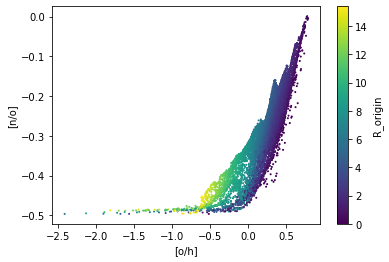

In [4]:
show_stars(stars, "[o/h]", "[n/o]", c="R_origin")

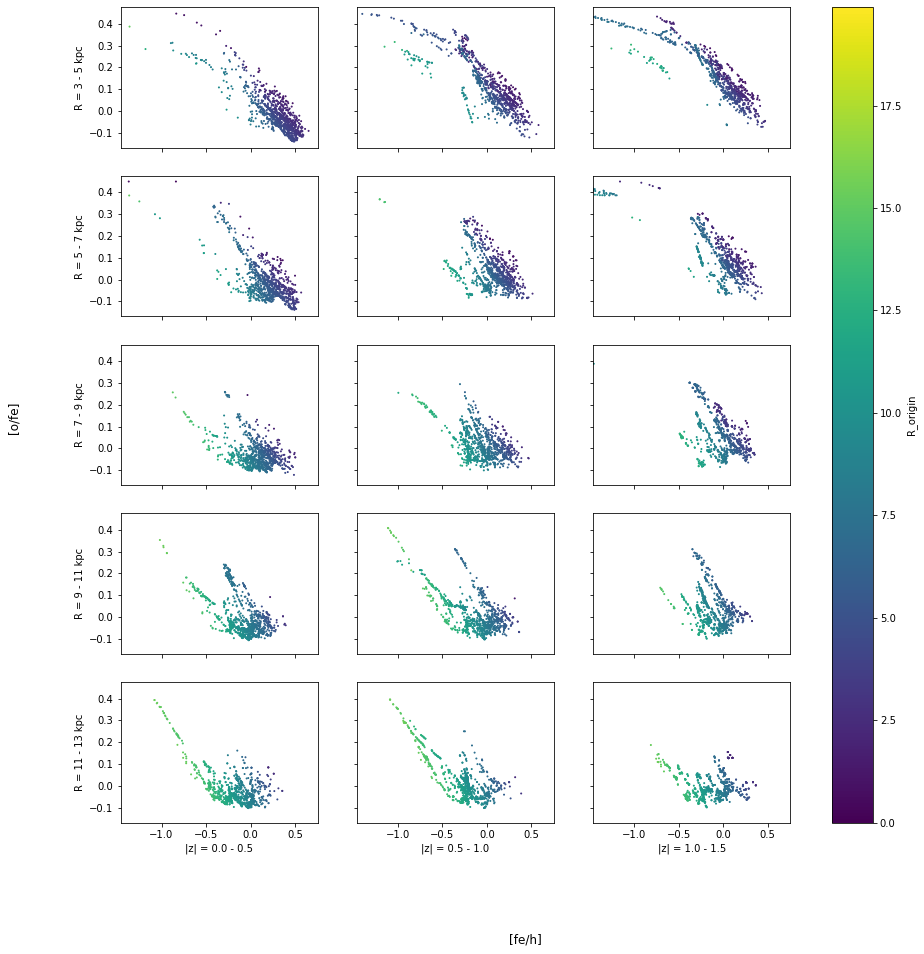

In [5]:
show_at_R_z(milkyway.stars, "[fe/h]", "[o/fe]", c="R_origin")

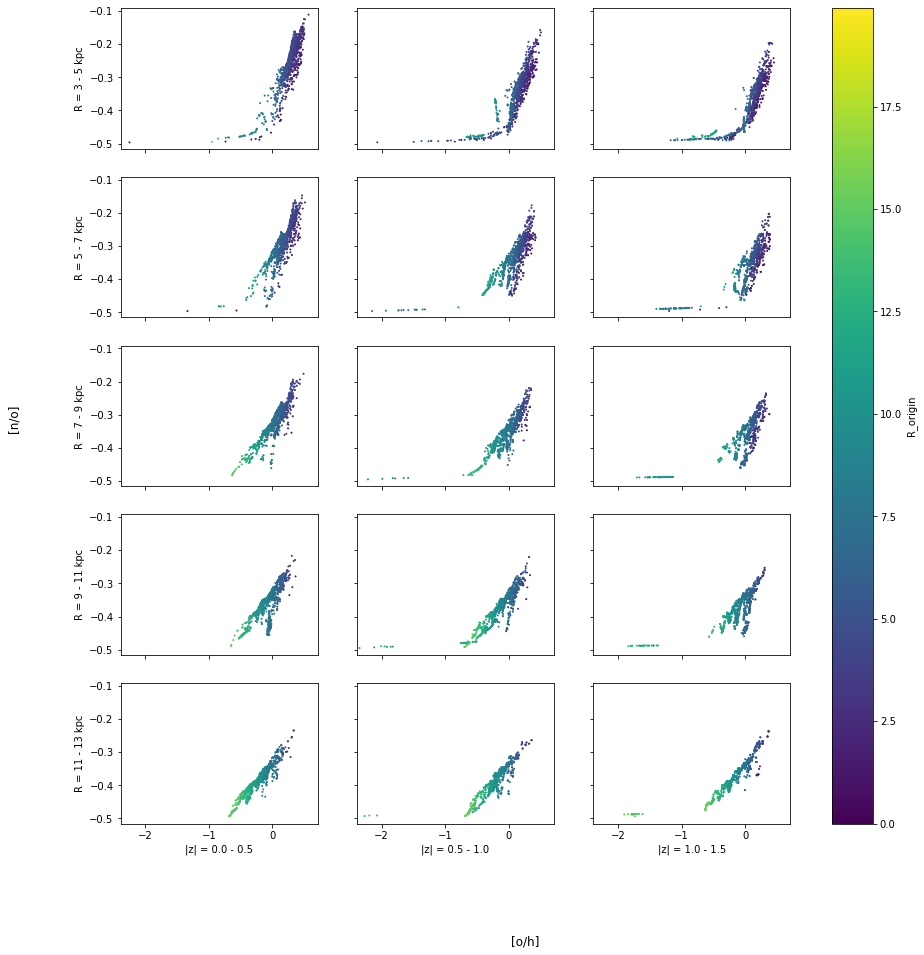

In [6]:
show_at_R_z(milkyway.stars, "[o/h]", "[n/o]", c="R_origin")

<Figure size 576x288 with 0 Axes>

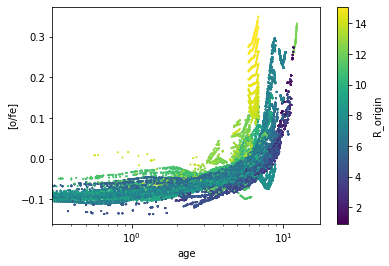

In [8]:
plt.figure(figsize=(8,4))
show_stars(sample_stars(filter_stars(milkyway.stars, 7, 9, 0, 0.5), 10**5), "age", "[o/fe]", c="R_origin")
plt.xscale("log")
plt.xlim(0.3)
plt.show()

Text(0, 0.5, '[N/O]')

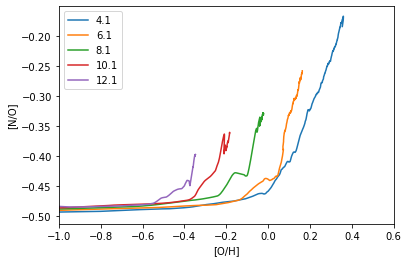

In [37]:
for i in R_to_zone(np.array([4, 6, 8, 10, 12])):
    x = milkyway.zones["zone%i" % i].history["[o/h]"]
    y = milkyway.zones["zone%i" % i].history["[n/o]"]
    plt.plot(x, y, label=i/10)
plt.legend()
plt.xlim(-1,0.6)
plt.xlabel("[O/H]")
plt.ylabel("[N/O]")

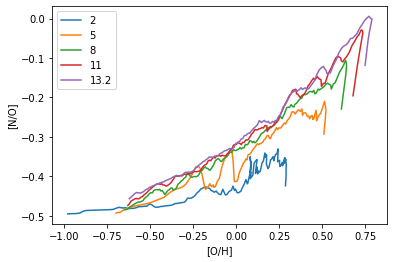

In [30]:
for t in [2, 5, 8, 11, 13.2]:
    j = int(100*t)
    
    y = np.zeros(155)
    x = np.zeros(155)
    R = np.arange(0, 15.5, 0.1)

    for i in range(155):
        y[i] = milkyway.zones["zone%i" % i].history["[n/o]"][j]
        x[i] = milkyway.zones["zone%i" % i].history["[o/h]"][j]
    plt.plot(x, y, label=t)


plt.xlabel("[O/H]")
plt.ylabel("[N/O]")
plt.legend()

Text(0, 0.5, '[n/h]')

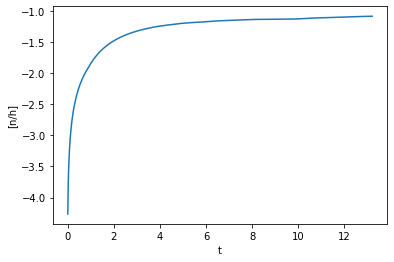

In [32]:
y = milkyway.zones["zone%i" % i].history["[n/h]"]
x = milkyway.zones["zone%i" % i].history["time"]
plt.plot(x, y)
plt.xlabel("t")
plt.ylabel("[n/h]")

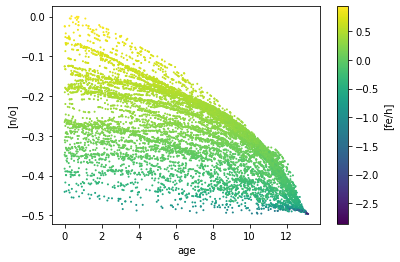

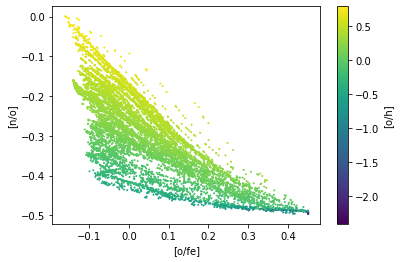

In [36]:
show_stars(stars, "age", "[n/o]", c="[fe/h]")
plt.show()
show_stars(stars, "[o/fe]", "[n/o]", c="[o/h]")

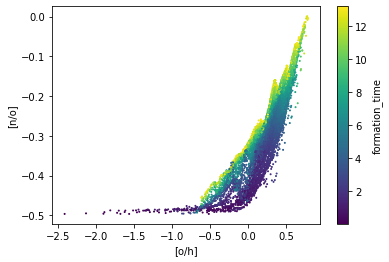

In [40]:
show_stars(stars, "[o/h]", "[n/o]", c="formation_time")